## Problem Statement

Most businesses consider leveraging customer information as essential. In particular, an insurance company can make important business decisions based on their customers' attributes. Thus, possessing the ability to explore and extract value from such data can be a highly valuable skill.

Suppose you are a newly hired Data Scientist at an insurance company tasked with analyzing customer data for the 'MediClaim' insurance policy. Your objective is to derive insights from past data by answering a few key questions. The dataset 'AxisInsurance' contains details about customers such as age, sex, and charges. To complete the task, perform statistical analysis to answer the following questions:

- Utilize Exploratory Data Analysis to extract insights from the dataset.
- Use statistical evidence to prove or disprove that smokers make greater medical claims than non-smokers.
- Use statistical evidence to prove or disprove that females have a different BMI than males.
- Determine if customers' smoking habits are dependent on their region by creating a contingency table with the pandas.crosstab() function.
- Determine if the mean BMI of women with no children, one child, and two children is the same by providing statistical evidence to support your answer.

The goal is to assist the company in making data-driven business decisions based on the answers to these questions.







## Assumptions
The Health Insurance Customer's data is a simple random sample from the population data, and the samples are independent of each other.

## Data Dictionary

**AxisInsurance.csv**  contains the following information about customers of the Axis Health Insurance.

1. Age - The age variable is an integer that denotes the primary beneficiary's age, excluding individuals aged 64 years or older who are typically covered by the government.
2. Sex - The sex variable pertains to the policy holder's gender and can be classified as male or female.
3. BMI - The BMI variable represents the body mass index, which determines if an individual is under or overweight based on their height and weight. It is calculated by dividing weight (in kilograms) by height (in meters) squared, with an ideal BMI ranging from 18.5 to 24.9.
4. Children - The children variable denotes the number of dependents or children covered by the insurance plan.
5. Smoker - The smoker variable is binary and indicates whether the insured person is a regular tobacco smoker (yes or no).
6. Region - The region variable refers to the beneficiary's residential location in the U.S. and is categorized into four geographic regions - northeast, southeast, southwest, or northwest.
7. Charges - The charges variable denotes individual medical costs charged by health insurance providers.

<b> Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import  libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# library for statistical tests
import scipy.stats as stats

### Exploratory Data Analysis - Step by step approach



Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Read the data into the notebook

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Freelance/Alberto/statistical_insurance/AxisInsurance.csv') # read the data as a data frame

### View the first and last 5 rows of the dataset

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(1338, 7)

* Dataset has 1338 rows and 7 columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Each column contains 1338 observations that are not null.
- The dataset has seven columns with the following names and data types: 'age' (int64), 'sex' (object), 'bmi' (float64), 'children' (int64), 'smoker' (object), 'region' (object), and 'charges' (float64).
- We can convert the 'sex', 'smoker', and 'region' columns from objects to categorical data.

coverting "objects" to "category type" reduces the space required to store the dataframe. 

In [12]:
df["sex"]=df["sex"].astype("category")
df["smoker"]=df["smoker"].astype("category")
df["region"]=df["region"].astype("category")

### Missing value treatment

In [13]:
df.isna().sum()   #null value check

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in any of the column.

### Five point summary 

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.682687,6.145674,14.0000,26.31500,30.400,34.700000,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- The statistics appear reasonable, indicating that the data is legitimate.
- Based on the age column, the data seems to accurately reflect the age distribution of the adult population.
- A majority of the individuals have two or fewer children, with only a small percentage having more than two.
- The amount claimed is heavily imbalanced, with a significant number of individuals only requiring basic medical care, and only a small fraction suffering from more expensive illnesses.




### Summary of categorical features

In [15]:
df.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* The data contains both female and male insurance holders
* The number of smokers in the dataframe are much less than the number of non-smokers.
* The insurance holders from the southeast region of the US occur more frequent than the others.

### Univariate analysis

- We are doing univariate analysis to understand the distribution of the features as there are higher chances that the features have skewness and are not normal so this can be handled only once we visualize the data
- Box plot and histograms are done to look for the distribution of a variable along the axis and to also check for the presence of outliers in the data. These boxplots show if a particular feature has higher number of outliers or if they are less so that outlier treatment can eb done on those features.
- labelled barplot is also being done as univariate analysis so that categorical variables can be visualized and observed how they are distributed among different classes and also to analyze if a particular feature has only one class and the requirement for removal of this feature as that may lead to overfitting.

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

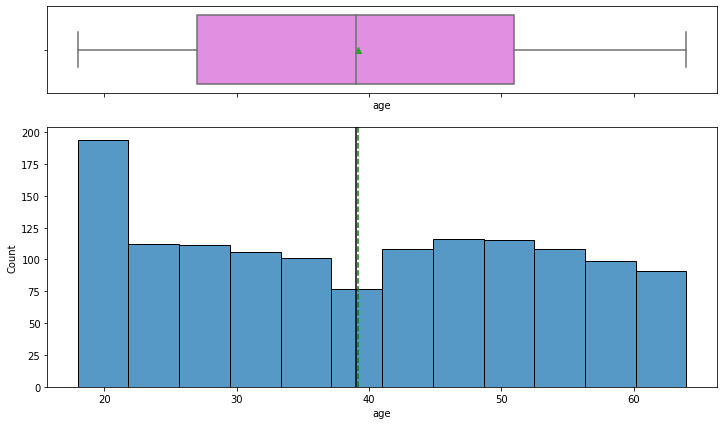

In [17]:
histogram_boxplot(df,'age')

* Age seems uniformly distributed, with both mean and median around 40 yearsfor age

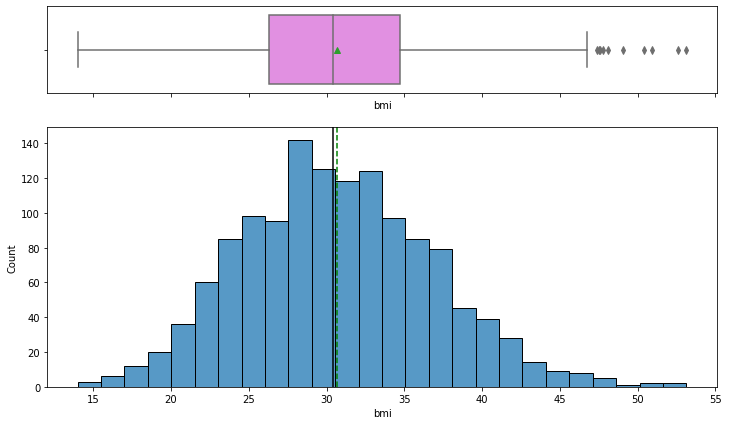

In [18]:
histogram_boxplot(df,'bmi')

* BMI looks to have a fairly normal distribution.

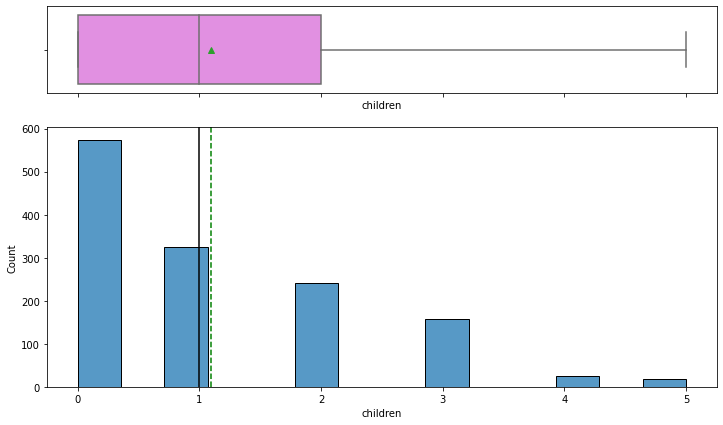

In [19]:
histogram_boxplot(df,'children')

- The distribution of the number of children is skewed to the left.
- The majority of clients have no children, while a significantly smaller number of clients have four or five children.
- Since there are only five distinct values for children, we incorporate them into the barplot of categorical variables.

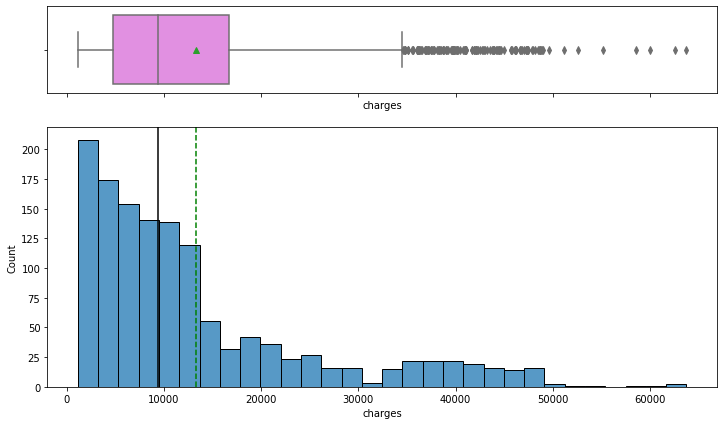

In [20]:
histogram_boxplot(df,'charges')

* Charges have a right-skewed distribution. The mean charges is higher than the median charges.
* This variable has a lot of outliers towards the higher end indicating that some people spend very high on their medicals.

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

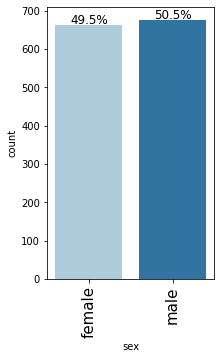

In [22]:
labeled_barplot(df, 'sex', perc=True)

* The distribution of observations across genders is fairly similar as we saw earlier as well.

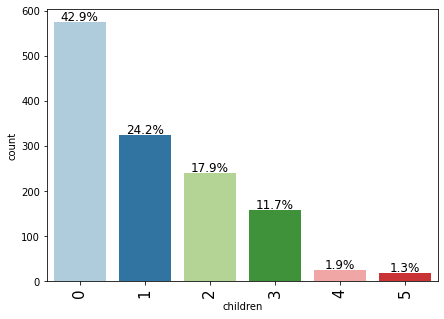

In [23]:
labeled_barplot(df, 'children', perc=True)

* ~42% of insurance holders do not have a child.
* ~42% of insurance holders have 1 or 2 children.

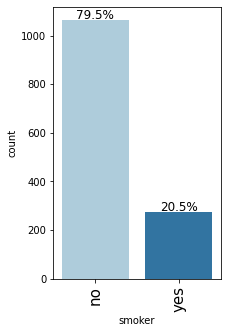

In [25]:
labeled_barplot(df, 'smoker', perc=True)

* 20% of the insurance holders are smokers. It will be interesting to see how smoking affects insurance claims. 

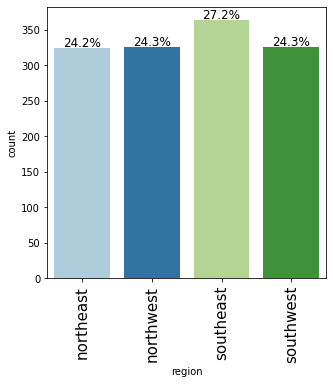

In [26]:
labeled_barplot(df, 'region', perc=True)

* The distribution of insurance holders across different regions of the US is fairly uniform. The Southeast region does have ~3% more observations as compared to others but we will have to test if this difference is statistically significant.  

### Bivariate Analysis

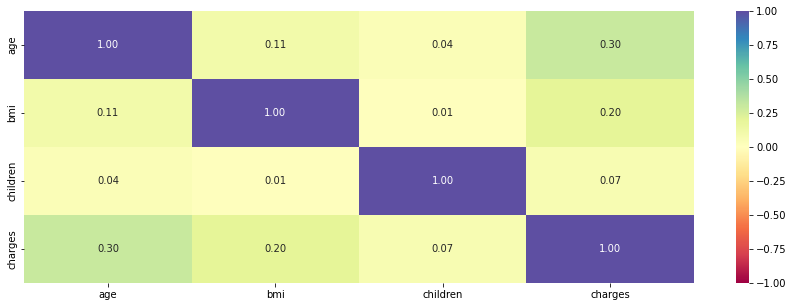

In [27]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* The correlation between all the continuous variables is positive but not too high.

Bi-variate distribution of all attribute pairs

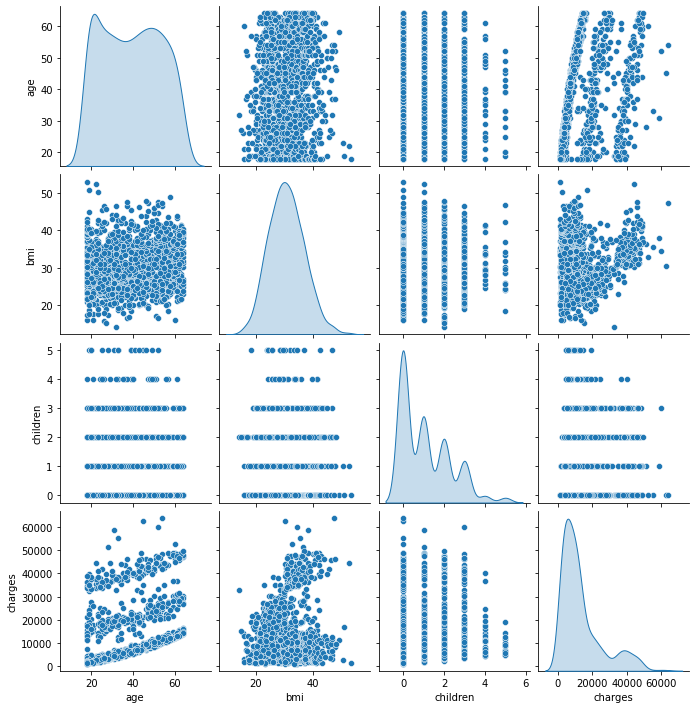

In [28]:
sns.pairplot(df, diag_kind ='kde')  #pairplot
plt.show()

* Age and Charges have an upward tendency with respect to each other. As Age increases, Charges also seem to increase a bit.

## Simple Hypothesis - Prove(or disprove)  that the medical claims made by the people who smoke is greater than those who don't? 

In [29]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

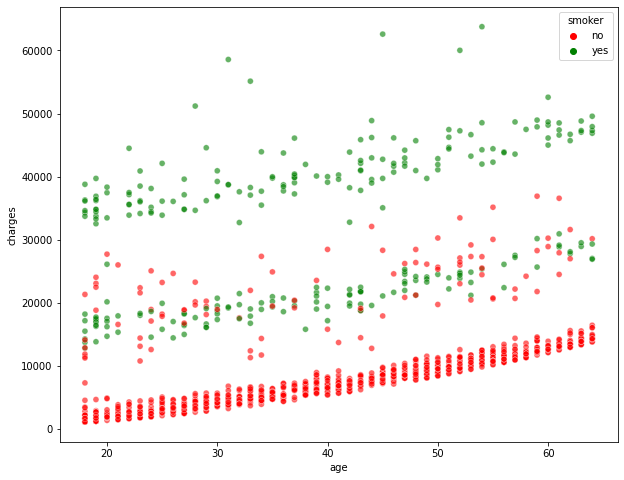

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'age', y = 'charges', hue='smoker', data = df, palette= ['red','green'] ,alpha=0.6)
plt.show()

- The distinction between charges incurred by smokers and non-smokers is clearly evident when viewed visually.
- Non-smokers tend to submit significantly lower medical bill claims compared to their smoking counterparts.
- To determine whether the mean charges of smokers are significantly higher than non-smokers, it is necessary to conduct an independent two-sample t-test.

### Step-1: Define the null and alternate hypotheses

$H_0:$ Mean charges of smokers is less than or equal to non-smokers.

$H_a:$ Mean charges of smokers is greater than non-smokers.

Let $\mu_1$ and $\mu_2$ be the mean charges of smokers and non-smokers respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1  \le \mu_2$

$H_a: \mu_1 > \mu_2$

### Step-2: Select Appropriate test

The statistical analysis for this problem involves testing the means of two independent populations using a one-tailed test. Given the lack of knowledge about population standard deviations, the appropriate statistical test to use would be the two-sample independent t-test.

### Step-3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step-4: Collecting and preparinig data

In [32]:
charges_smokers = df[df['smoker'] == 'yes']['charges']
charges_non_smokers = df[df['smoker'] == 'no']['charges']

In [33]:
print("The sample mean of the charges of smokers is:", round(charges_smokers.mean(),2))
print("The sample mean of the charges of non-smokers:", round(charges_non_smokers.mean(),2))
print('The sample standard deviation of the charges of smokers is:', round(charges_smokers.std(),2))
print('The sample standard deviation of the charges of non-smokers is:', round(charges_non_smokers.std(),2))

The sample mean of the charges of smokers is: 32050.23
The sample mean of the charges of non-smokers: 8434.27
The sample standard deviation of the charges of smokers is: 11541.55
The sample standard deviation of the charges of non-smokers is: 5993.78


The sample standard deviations are different so the population standard deviations may be assumed to be different.

### Step-5: Calculating the p-value

In [34]:
# finding the p-value
test_stat, p_value = stats.ttest_ind(charges_smokers, charges_non_smokers, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 2.94473222335849e-103


### Step-6: Comparing the p-value with $\alpha$

In [35]:
# Printing conclusion
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 2.94473222335849e-103 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. So we have enough statistical evidence to say that the medical claims made by the people who smoke are greater than those who don't.

## 3. Hypothesis - Prove (or disprove) with statistical evidence that BMI of females is different from that of males.

In [36]:
df.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

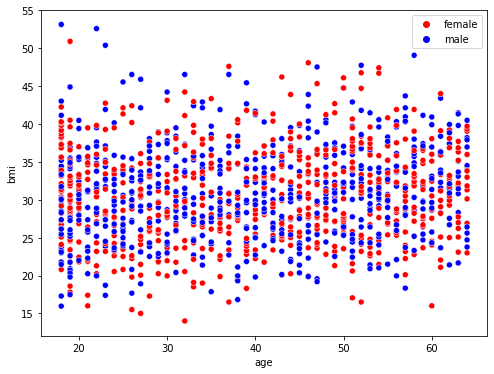

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.age,y= df.bmi,hue=df.sex,palette= ['red','blue'] )
plt.legend(loc='upper right')
plt.show()

* Visually, there is no apparent relation between gender and BMI.

### Step 1: Define the null and alternate hypotheses

$H_0:$ Mean BMI of females is same as that of males.

$H_a:$ Mean BMI of females is different than that of males

Let $\mu_1$ and $\mu_2$ be the mean BMI of females and males respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1  = \mu_2$

$H_a: \mu_1 \neq \mu_2$

### Step 2: Select Appropriate test

This is a two-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two-sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [39]:
bmi_females = df[df['sex'] == 'female']['bmi']
bmi_males = df[df['sex'] == 'male']['bmi']

In [40]:
print("The sample mean of the BMI's of females is:", round(bmi_females.mean(),2))
print("The sample mean of the BMI's of males is:", round(bmi_males.mean(),2))
print("The sample standard deviation of the BMI's of females is:", round(bmi_females.std(),2))
print("The sample standard deviation of the BMI's of males is:", round(bmi_males.std(),2))

The sample mean of the BMI's of females is: 30.42
The sample mean of the BMI's of males is: 30.94
The sample standard deviation of the BMI's of females is: 6.14
The sample standard deviation of the BMI's of males is: 6.14


The sample standard deviations are very close so the population standard deviations may be assumed to be equal.

### Step 5: Calculate the p-value

In [41]:
test_stat, p_value = stats.ttest_ind(bmi_females, bmi_males, equal_var = True, alternative = 'two-sided')
print('The p-value is', p_value)

The p-value is 0.11728314042826014


### Step 6: Compare the p-value with $\alpha$

In [42]:
# print the conclusion 
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.11728314042826014 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we don't have enough statistical evidence to say that the BMI of females is different from that of males.

## 4. Question - Does the smoking habit of customers depend on their region?


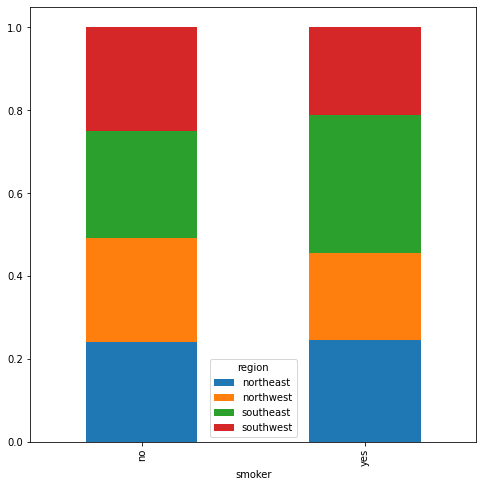

In [43]:
# Dependency between proportions of smokers and different regions
pd.crosstab(df['smoker'],df['region'], normalize='index').plot(kind="bar", figsize=(8,8),
                 stacked=True)

plt.show()

* The proportion of smokers in southeast region is higher than all other regions.

### Step 1: Define the null and alternate hypotheses

$H_0:$ Region has no effect on smoking habits

$H_a:$ Region has an effect on smoking habits

### Step 2: Select Appropriate test

This is a problem of the Chi-square test of independence, concerning the two independent categorical variables, smoker and region.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [44]:
# create a contingency table showing the distribution of smokers across different regions
contingency_table = pd.crosstab(df['smoker'],df['region'])
contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


### Step 5: Calculate the p-value

In [45]:
# use chi2_contingency() to find the p-value
chi2, p_value, dof, exp_freq = stats.chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.06171954839170547


### Step 6: Compare the p-value with $\alpha$

In [46]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06171954839170547 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the smoking habit of customers depends on their region.

## 5.	Question - Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

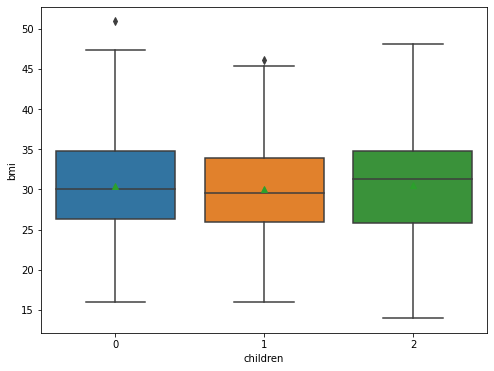

In [47]:
# visual analysis of the BMI of women with 0, 1, and 2 children
plt.figure(figsize=(8,6))
# create a new DataFrame for customers who are female and have 0,1, or 2 children
df_new = df[(df['sex']=='female') & (df['children']<3)]
sns.boxplot(x = 'children', y = 'bmi', showmeans = True, data = df_new)
plt.show()

The BMI of women with 0, 1, and 2 children do not look very different, but we need to test whether this difference is statistically significant.

In [48]:
# Checking the mean BMI's of woman with 0, 1, and 2 children
df_new.groupby(['children'])['bmi'].mean()


children
0    30.485502
1    30.047500
2    30.572437
Name: bmi, dtype: float64

The mean BMI of women with 0, 1, and 2 children are very close to each other.

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean BMIs of woman with 0, 1, and 2 children are equal.

$H_a:$ At least one of the mean BMIs of woman with 0, 1, and 2 children is unequal.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ BMI of women follows a normal distribution

against the alternative hypothesis

>$H_a:$ BMI of women does not follow a normal distribution

In [49]:
# Assumption 1: Normality - use Shapiro function for the test

# finding the p-value
w, p_value = stats.shapiro(df_new['bmi'])
print('The p-value is', p_value)

The p-value is 0.20667335391044617


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [50]:
#Assumption 2: Homogeneity of Variance - use the levene function for this test

# find the p-value
statistic, p_value = stats.levene(df_new[df_new['children']==0]['bmi'], 
                             df_new[df_new['children']==1]['bmi'], 
                             df_new[df_new['children']==2]['bmi'])

print('The p-value is', p_value)

The p-value is 0.33762398820932993


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [51]:
bmi_women_zero = df_new[df_new['children']==0]['bmi']
bmi_women_one = df_new[df_new['children']==1]['bmi']
bmi_women_two = df_new[df_new['children']==2]['bmi']

### Step 5: Calculate the p-value

In [53]:
# performing ANOVA test using f_oneway function

# find the p-value
test_stat, p_value = stats.f_oneway(bmi_women_zero, bmi_women_one, bmi_women_two)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.7200129592186635


### Step 6: Compare the p-value with $\alpha$

In [54]:
# print the conclusion 
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.7200129592186635 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Drawing inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean BMIs of women with 0, 1, and 2 children are equal.

## Insights and conclusion

- Smokers tend to make more claims than non-smokers, suggesting a need for the company to develop tailored policies for each group of customers based on their smoking habits.

- On average, both males and females have similar BMI measurements.

- The geographic region where a customer resides does not appear to be a determining factor in their smoking behavior.

- Women with varying numbers of children (0, 1, or 2) have similar average BMI measurements.